   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
R² Score: 0.7836
RMSE: 5796.28

Model Coefficients:
            Feature   Coefficient
0               age   3614.975415
1               bmi   2036.228123
2          children    516.890247
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


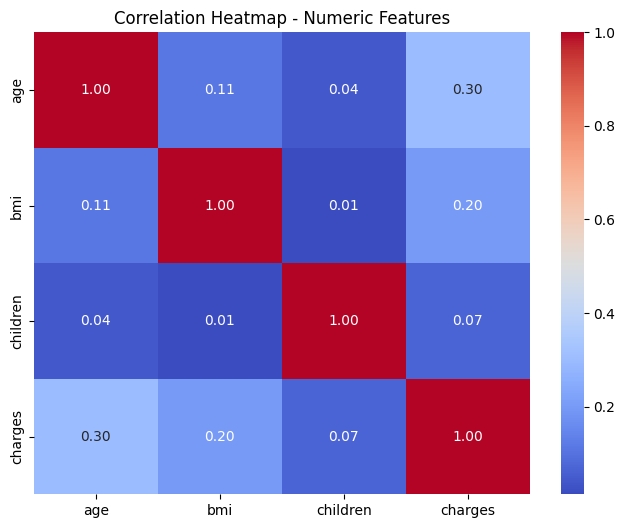

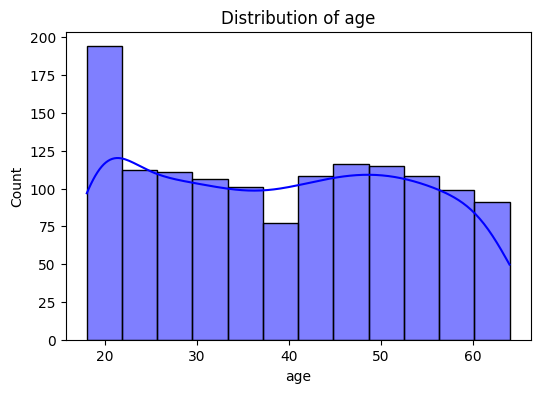

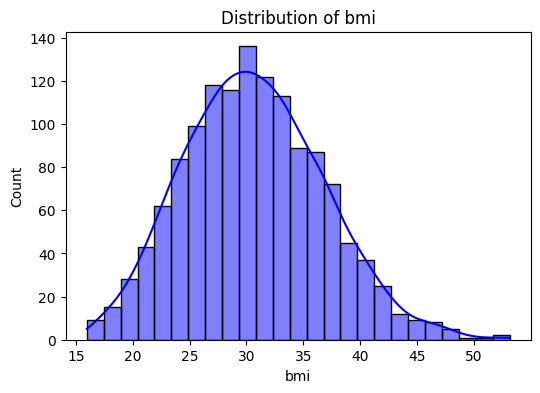

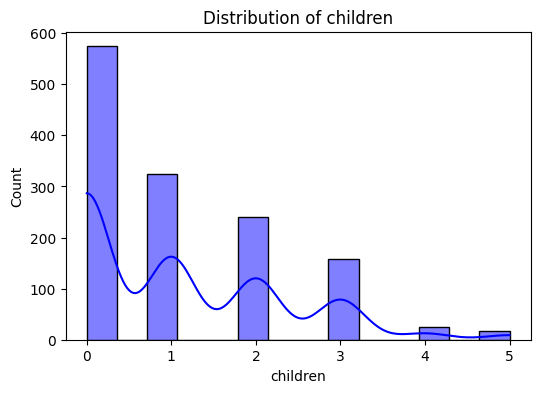

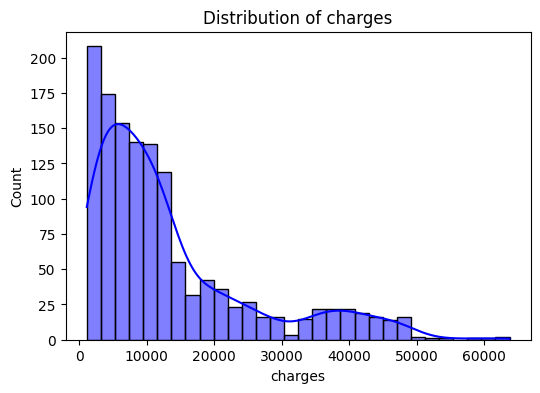

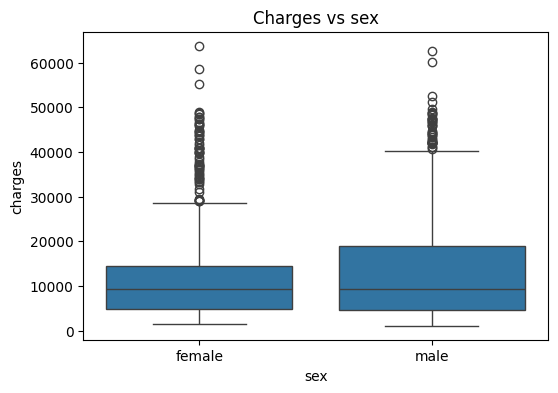

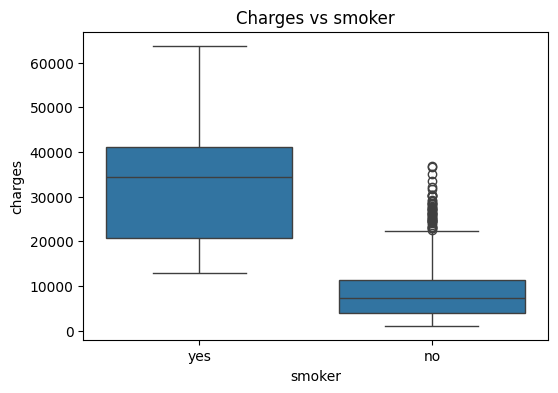

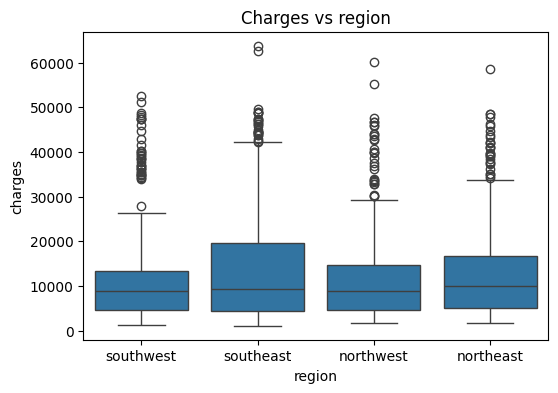

R² Score: 0.7836
RMSE: 5796.28


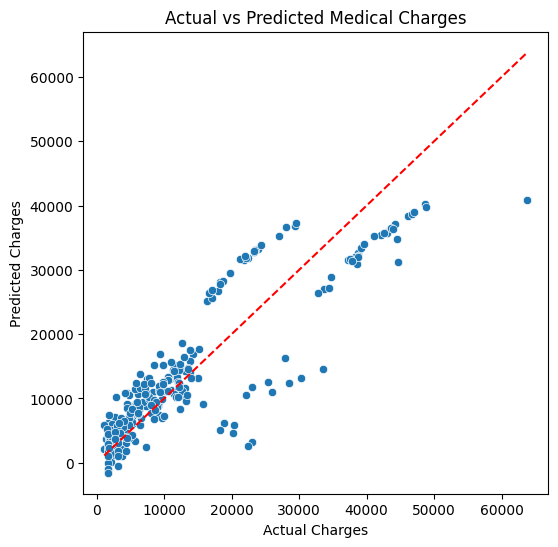

In [ ]:
# Medical Cost Personal Dataset - Multiple Linear Regression 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load dataset
df = pd.read_csv("insurance.csv")  
print(df.head())


X = df.drop("charges", axis=1)
y = df["charges"]

# 3. Identify categorical and numeric columns
categorical_features = ["sex", "smoker", "region"]
numeric_features = [col for col in X.columns if col not in categorical_features]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# 5. Create pipeline with preprocessing and Linear Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train model
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Optional: View coefficients with feature names
feature_names = numeric_features + list(model.named_steps["preprocessor"]
                                        .named_transformers_["cat"]
                                        .get_feature_names_out(categorical_features))
coefficients = model.named_steps["regressor"].coef_
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
print("\nModel Coefficients:")
print(coef_df)

# 2. Correlation Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

# 3. Distribution plots for numeric features
numeric_cols = ["age", "bmi", "children", "charges"]
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

# 4. Boxplots for categorical features vs charges
categorical_cols = ["sex", "smoker", "region"]
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y="charges", data=df)
    plt.title(f"Charges vs {col}")
    plt.show()

# 5. Preprocessing
X = df.drop("charges", axis=1)
y = df["charges"]

categorical_features = ["sex", "smoker", "region"]
numeric_features = ["age", "bmi", "children"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# 6. Model Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train model
model.fit(X_train, y_train)

# 9. Predictions
y_pred = model.predict(X_test)

# 10. Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# 11. Predicted vs Actual Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()
